# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Описание проекта:  
Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.  

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.  
 
Шаги для выбора локации:  

В избранном регионе ищем месторождения, для каждого опредеим значения признаков.  
Строим модель и оцениваем объём запасов.  
Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины.  
Прибыль равна суммарной прибыли отобранных месторождений.  



Цели проекта:  
Провести исследование с целью построения математической модели и определить регион, где добыча нефти принесёт наибольшую прибыль.  

Результаты исследования позволят увеличить прибыль добывающей компании «ГлавРосГосНефть».

## Загрузка и подготовка данных

### Загрузка инструментария

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import numpy as np
import random

 
!pip install phik -q
import phik
# Модели 
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split

 
from sklearn.linear_model import LinearRegression

 

#Метрики
from sklearn.metrics import mean_squared_error
 
from sklearn.metrics import   make_scorer
 

### Загрузка и проверка наборов данных


In [2]:
geo_data_0= pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1= pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2= pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(geo_data_0.head(10))
geo_data_0.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
#display(len(geo_data_0['id'].unique()) )
display(geo_data_0.duplicated().sum())
#display(geo_data_0['id'].duplicated().sum())

0

In [5]:
geo_data_0 = geo_data_0.drop('id', axis=1)

In [6]:
display(geo_data_1.head(10))
geo_data_1.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
display(geo_data_1.duplicated().sum())


0

In [8]:
geo_data_1 = geo_data_1.drop('id', axis=1)

In [9]:
display(geo_data_2.head(10))
geo_data_2.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
display(geo_data_2.duplicated().sum())
 

0

In [11]:
geo_data_2 = geo_data_2.drop('id', axis=1)

Датасеты равны по размеру.  
Пропусков нет  
Категориальных признаков нет  
Масштабирование проводить не нужно

### Распределение значений

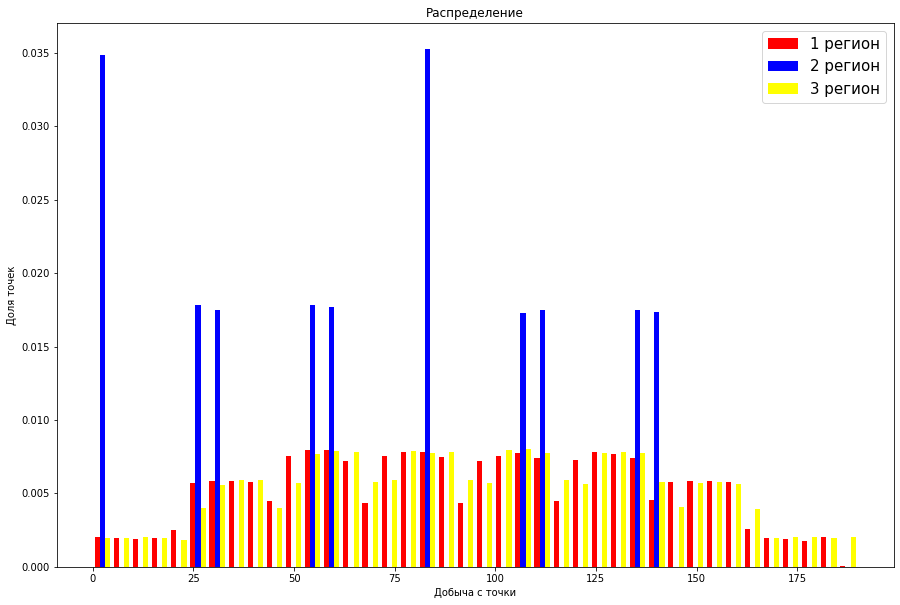

In [12]:
colors=['red','blue','yellow']
labels=['1 регион','2 регион','3 регион']
plt.figure(figsize=(15,10))
plt.hist(x=[geo_data_0['product'],geo_data_1['product'],geo_data_2['product']],
         color = colors, bins=40 , density=True,
         label=labels);
plt.title('Распределение')
plt.xlabel('Добыча с точки')
plt.ylabel('Доля точек')
plt.legend(['1 регион','2 регион','3 регион'])
plt.legend(loc=1)
plt.legend(prop={'size': 15}, title = '')


In [13]:
def analysis_HIST(adata_in,adata_in1,adata_in2, chapter,   Х,   bins):
    #print(adata_in[chapter].describe())
    #adata_ini = adata_in.groupby(chapter).mean()
    #display(adata_in[chapter].head(5))
    plt.title('Показатели 1 региона')
    plt.xlabel(Х)
    plt.ylabel("Доля показателей")
    
    plt.hist(x=adata_in[chapter], bins=bins, density=True)
    plt.figure(figsize=(10,5))
    
    plt.title('Показатели 2 региона')
    plt.xlabel(Х)
    plt.ylabel("Доля показателей")
    
    plt.hist(x=adata_in1[chapter], bins=bins, density=True)
    plt.figure(figsize=(10,5))
    
    plt.title('Показатели 3 региона')
    plt.xlabel(Х)
    plt.ylabel("Доля показателей")
    
    plt.hist(x=adata_in2[chapter], bins=bins, density=True)
    plt.figure(figsize=(10,5))
    #plt.show() 

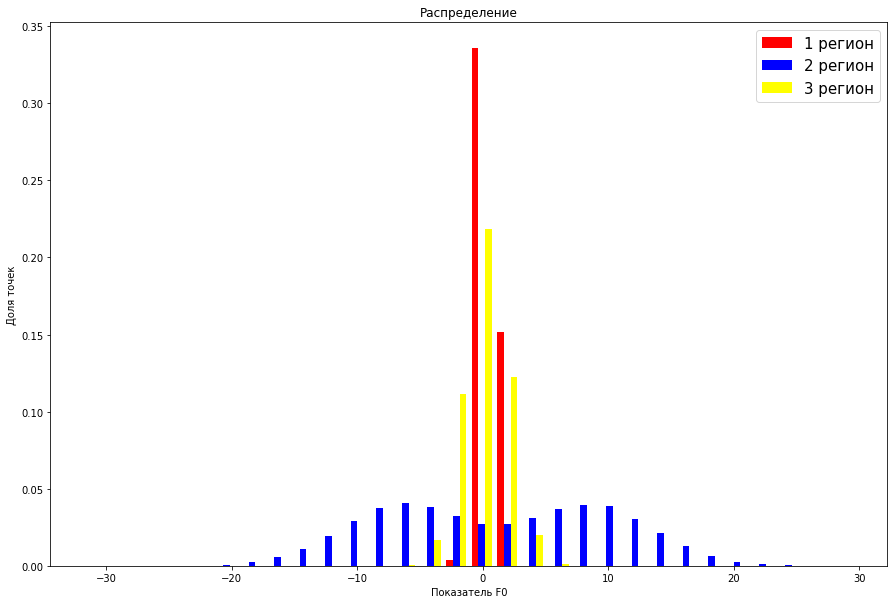

In [14]:
colors=['red','blue','yellow']
labels=['1 регион','2 регион','3 регион']
plt.figure(figsize=(15,10))
plt.hist(x=[geo_data_0['f0'],geo_data_1['f0'],geo_data_2['f0']],
         color = colors, bins=30 , density=True,
         label=labels);
plt.title('Распределение')
plt.xlabel('Показатель F0')
plt.ylabel('Доля точек')
plt.legend(['1 регион','2 регион','3 регион'])
plt.legend(loc=1)
plt.legend(prop={'size': 15}, title = '')


<b>Вывод:</b>   


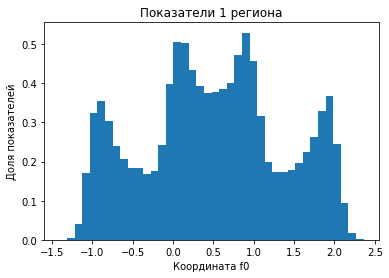

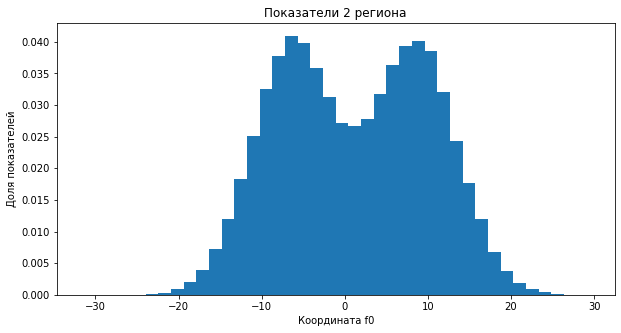

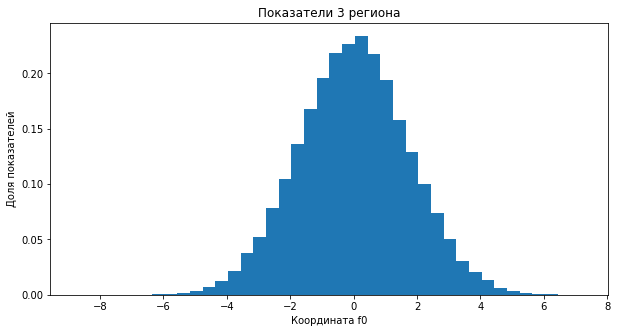

<Figure size 720x360 with 0 Axes>

In [15]:
analysis_HIST(geo_data_0,
              geo_data_1,
              geo_data_2,
             'f0',
             'Координата f0',
              
             40)

<b>Вывод:</b>  

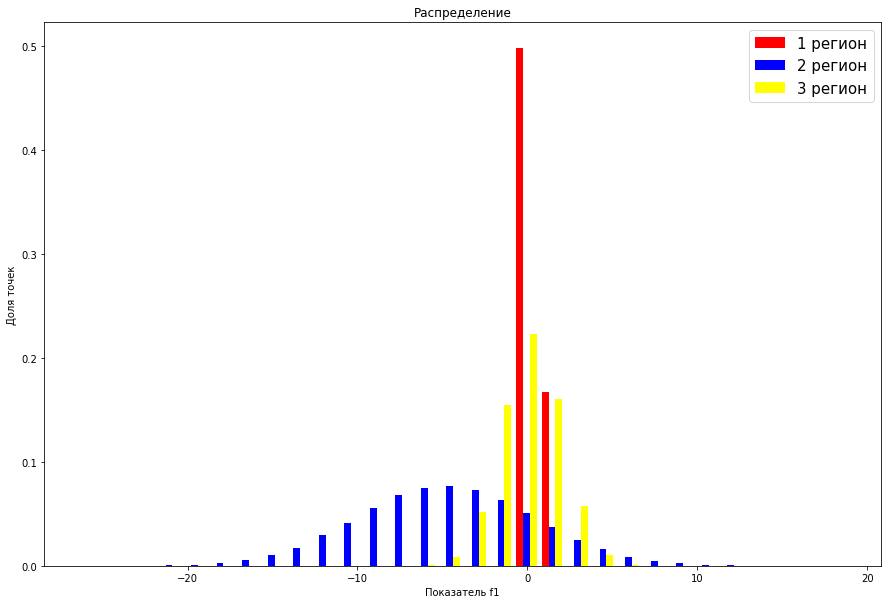

In [16]:
colors=['red','blue','yellow']
labels=['1 регион','2 регион','3 регион']
plt.figure(figsize=(15,10))
plt.hist(x=[geo_data_0['f1'],geo_data_1['f1'],geo_data_2['f1']],
         color = colors, bins=30 , density=True,
         label=labels);
plt.title('Распределение')
plt.xlabel('Показатель f1')
plt.ylabel('Доля точек')
plt.legend(['1 регион','2 регион','3 регион'])
plt.legend(loc=1)
plt.legend(prop={'size': 15}, title = '')


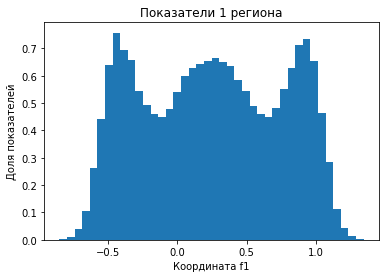

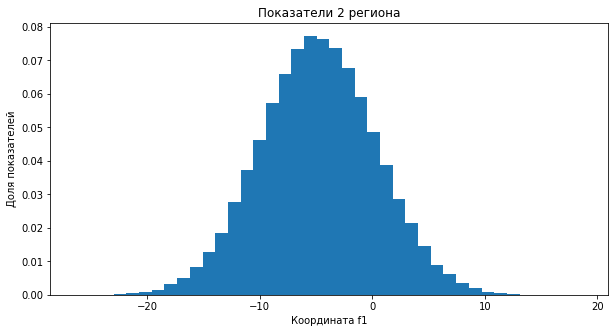

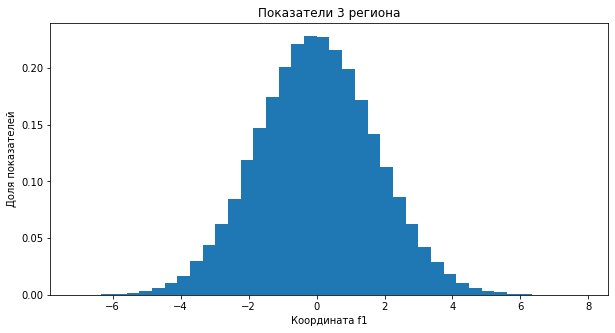

<Figure size 720x360 with 0 Axes>

In [17]:
analysis_HIST(geo_data_0,
              geo_data_1,
              geo_data_2,
             'f1',
             'Координата f1',  
             40)

<b>Вывод:</b>  

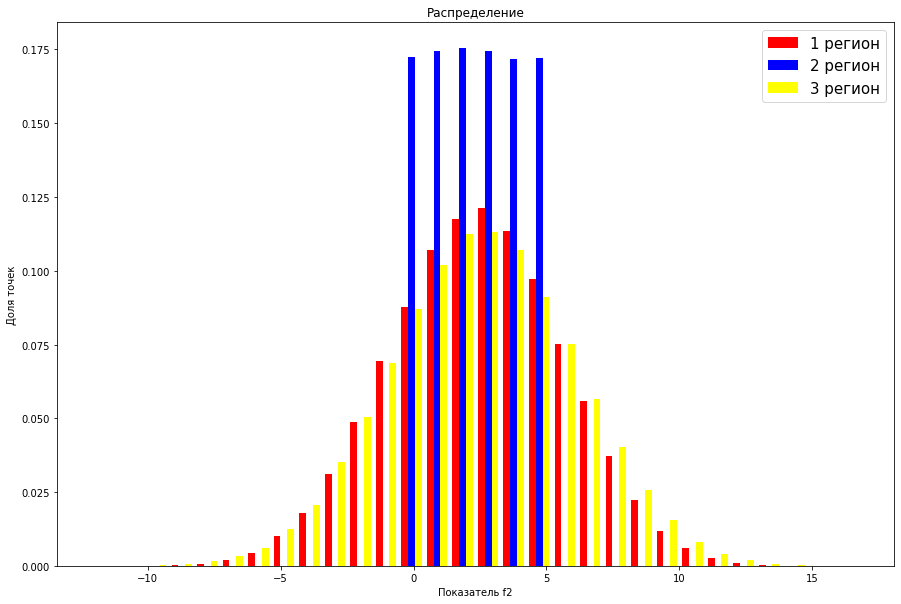

In [18]:
colors=['red','blue','yellow']
labels=['1 регион','2 регион','3 регион']
plt.figure(figsize=(15,10))
plt.hist(x=[geo_data_0['f2'],geo_data_1['f2'],geo_data_2['f2']],
         color = colors, bins=30 , density=True,
         label=labels);
plt.title('Распределение')
plt.xlabel('Показатель f2')
plt.ylabel('Доля точек')
plt.legend(['1 регион','2 регион','3 регион'])
plt.legend(loc=1)
plt.legend(prop={'size': 15}, title = '')


<b>Вывод:</b>  

Распределения для разных набров данных сильно отличаются, особенно выделяются аномалии для целевого признака и признака f2 у 1 датасета.

### Корреляционный анализ

interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


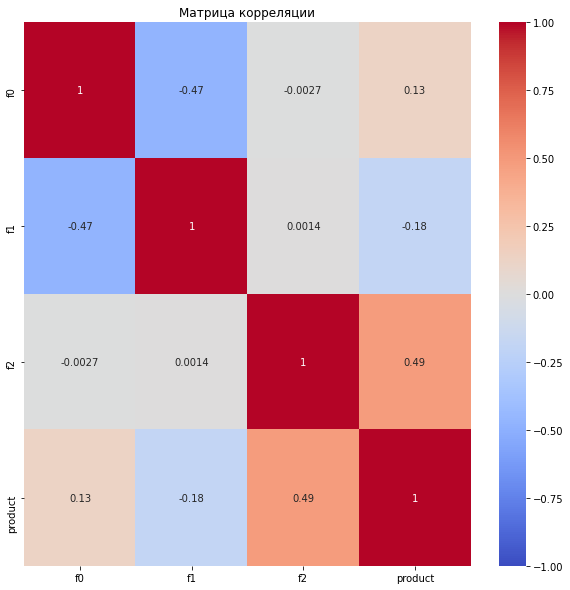

,f0,f1,f2,product
product,0.128417,-0.181143,0.486394,1.000000
f2,-0.002685,0.001413,1.000000,0.486394
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


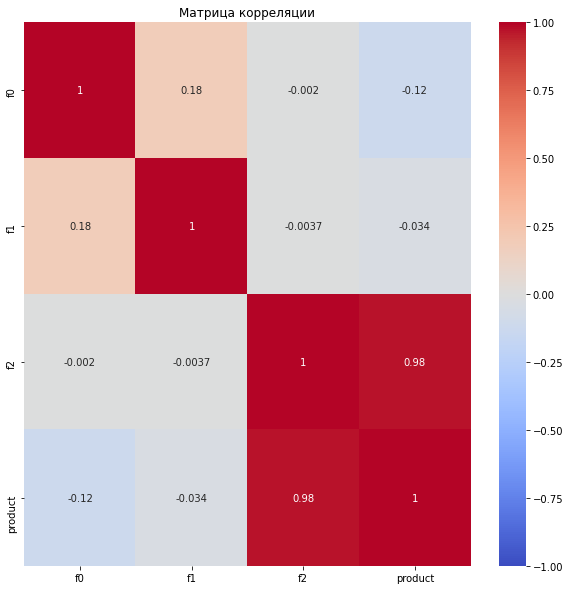

,f0,f1,f2,product
product,-0.122869,-0.033908,0.975605,1.000000
f2,-0.002000,-0.003678,1.000000,0.975605
f1,0.182248,1.000000,-0.003678,-0.033908
f0,1.000000,0.182248,-0.002000,-0.122869


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


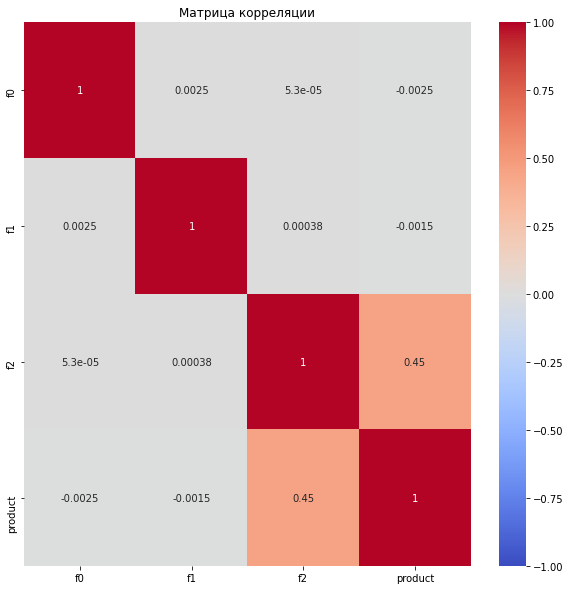

,f0,f1,f2,product
product,-0.002464,-0.001463,0.448463,1.000000
f2,0.000053,0.000378,1.000000,0.448463
f1,0.002493,1.000000,0.000378,-0.001463
f0,1.000000,0.002493,0.000053,-0.002464


In [19]:
data_corr0=geo_data_0.copy()
data_corr1=geo_data_1.copy()
data_corr2=geo_data_2.copy()


corr_matrix = data_corr0.phik_matrix()
corr_matrix = data_corr0.corr(method='spearman')
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='product', ascending=False))


corr_matrix = data_corr1.phik_matrix()
corr_matrix = data_corr1.corr(method='spearman')
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='product', ascending=False))

corr_matrix = data_corr2.phik_matrix()
corr_matrix = data_corr2.corr(method='spearman')
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='product', ascending=False))

### Промежуточный вывод
Инструменты загружены


Датасеты равны по размеру.  
Пропусков нет  
Категориальных признаков нет  
Масштабирование проводить не нужно

Распределения для разных набров данных сильно отличаются, особенно выделяются аномалии для целевого признака и признака f2 у 1 датасета.

В ходе изучения коллинеарности обнаружена зависимость показателей F2 b product

В дальнейшем целесообразно использование линейной регерессии

## Обучение и проверка модели

### Выделение целевого признака

In [20]:
target0=geo_data_0["product"] 
target1=geo_data_1["product"] 
target2=geo_data_2["product"] 

In [21]:
other_sign0=geo_data_0.drop(["product"], axis=1)
other_sign1=geo_data_1.drop(["product"], axis=1)
other_sign2=geo_data_2.drop(["product"], axis=1)

In [22]:
RANDOMSTATE = np.random.RandomState(12345)


### Разбивка на подвыборки

In [23]:
other_sign_train0, other_sign_valid0, target_train0, target_valid0 =train_test_split(other_sign0, target0,
                                                                                     test_size=0.25, random_state=RANDOMSTATE)


In [24]:
other_sign_train1, other_sign_valid1, target_train1, target_valid1 = train_test_split(other_sign1, target1,
                                                                                      test_size=0.25, random_state=RANDOMSTATE)


In [25]:
other_sign_train2, other_sign_valid2, target_train2, target_valid2 =train_test_split(other_sign2, target2,
                                                                                     test_size=0.25, random_state=RANDOMSTATE)


### Линейная модель

In [26]:
model0 = LinearRegression()
model0.fit( other_sign_train0, target_train0)


LinearRegression()

In [27]:
model1 = LinearRegression()
model1.fit( other_sign_train1, target_train1)


LinearRegression()

In [28]:
model2 = LinearRegression()
model2.fit( other_sign_train2, target_train2)


LinearRegression()

### Определяем среднее значения и показатели

In [30]:
predictions0 = model0.predict(other_sign_valid0)
display(predictions0)
display("Средний запас предсказанного сырья: тыс. баррелей.", predictions0.mean() )

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

'Средний запас предсказанного сырья: тыс. баррелей.'

92.59256778438035

In [31]:
predictions1 = model1.predict(other_sign_valid1)
display(predictions1)
display("Средний запас предсказанного сырья: тыс. баррелей.", predictions1.mean() )

array([54.23815201, 83.21787849,  2.97146723, ..., 83.90176874,
       -1.25947259, 26.16957032])

'Средний запас предсказанного сырья: тыс. баррелей.'

68.76995145799754

In [32]:
predictions2 = model2.predict(other_sign_valid2)
display(predictions2)
display("Средний запас предсказанного сырья: тыс. баррелей.", predictions2.mean() )

array([112.56187784,  69.46407333,  69.86622946, ..., 108.35059685,
       106.59141919, 124.86622084])

'Средний запас предсказанного сырья: тыс. баррелей.'

95.087528122523

### Сравнение показателей по регионам

In [33]:
print("Средний запас предсказанного сырья: тыс. баррелей. 1 регион", predictions0.mean() )
print("Средний запас предсказанного сырья: тыс. баррелей. 2 регион", predictions1.mean() )
print("Средний запас предсказанного сырья: тыс. баррелей. 3 регион", predictions2.mean() )

Средний запас предсказанного сырья: тыс. баррелей. 1 регион 92.59256778438035
Средний запас предсказанного сырья: тыс. баррелей. 2 регион 68.76995145799754
Средний запас предсказанного сырья: тыс. баррелей. 3 регион 95.087528122523


In [34]:
print('Значение RMSE для 1 регона',(mean_squared_error(predictions0, target_valid0))**0.5)
print('Значение RMSE для 2 регона',(mean_squared_error(predictions1, target_valid1))**0.5)
print('Значение RMSE для 3 регона',(mean_squared_error(predictions2, target_valid2))**0.5)

Значение RMSE для 1 регона 37.5794217150813
Значение RMSE для 2 регона 0.889736773768065
Значение RMSE для 3 регона 39.958042459521614


### Промежуточный вывод

1. Выборку разделили на тестовую и валидационную в заданном соотношении 1 к 3
2. Создали и обучили модель
3. Выполнены предсказания
4. Выполнены предсказания по объёму сырья
5. Рассчитаны значения среднего запаса предсказанного сырья и RMSE моделей (у второго показателя RMSE модели = 0.89, это связано с корреляцией между f2 и продуктом 0,98) (У остальных регионов показатель RMSE слишком большой)
6. Худшие показатели предсказанного сырья у 2 региона

## Подготовка к расчёту прибыли

###  Выделить показатели

In [35]:
# Введем значения которые будут использоваться в дальнейшем расчете
TOT = 500
BEST = 200
COST = 450
# Доступный бюджет для региона 10 млрд ( у нас показатели добычи в тысячах, тее 10^7)
SUMM= 10000000

BOOT=1000


### Расчет требуемых значений прибыли

In [36]:
display('Кол-во добычи, нужное для экономической выгоды в отдельном регионе', SUMM/COST )

'Кол-во добычи, нужное для экономической выгоды в отдельном регионе'

22222.222222222223

In [37]:
treb=SUMM/(COST*BEST)
display('Кол-во добычи, нужное для экономической выгоды в отдельной скважине из 200 лучших', treb )

'Кол-во добычи, нужное для экономической выгоды в отдельной скважине из 200 лучших'

111.11111111111111

### Сравнение требуемых значений с требуемыми

In [38]:
print("Сравнение предсказаний добычи с требованием   1 регион", predictions0.mean(), '<',treb )
print("Сравнение предсказаний добычи с требованием   2 регион", predictions1.mean(), '<',treb )
print("Сравнение предсказаний добычи с требованием  3 регион", predictions2.mean(), '<',treb )

Сравнение предсказаний добычи с требованием   1 регион 92.59256778438035 < 111.11111111111111
Сравнение предсказаний добычи с требованием   2 регион 68.76995145799754 < 111.11111111111111
Сравнение предсказаний добычи с требованием  3 регион 95.087528122523 < 111.11111111111111


### Промежуточный вывод

1. Среднее значение запаса сырья по всем скважинам для каждого из регионов меньше, чем объём сырья для безубыточной разработки новой скважины ( 111 тыс. баррелей).
2. Разработку всех скважин вести нерентабельно.

## Расчёт прибыли и рисков 

### Выбор лучших скважин

In [39]:
predictions0 = pd.DataFrame(predictions0, columns= ['product'])
predictions0_best=  predictions0.sort_values(by='product',ascending=False).head(200) 
predictions0_best.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 9317 to 20340
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [40]:
predictions0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  25000 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [41]:
predictions1 = pd.DataFrame(predictions1, columns= ['product'])
predictions1_best=  predictions1.sort_values(by='product',ascending=False).head(200) 
predictions1_best.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 10423 to 300
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


In [42]:
predictions2 = pd.DataFrame(predictions2, columns= ['product'])
predictions2_best=  predictions2.sort_values(by='product',ascending=False).head(200) 
predictions2_best.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 12030 to 19499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


### Расчет средней прибыли

In [43]:
profit0 = predictions0_best.sum()*COST-SUMM
print('Прибыль отвыборки из 1 региона', profit0)
profit1 = predictions1_best.sum()*COST-SUMM
print('Прибыль отвыборки из 2 региона', profit1)
profit2 = predictions2_best.sum()*COST-SUMM
print('Прибыль отвыборки из 3 региона', profit2)

Прибыль отвыборки из 1 региона product    3.996049e+06
dtype: float64
Прибыль отвыборки из 2 региона product    2.487389e+06
dtype: float64
Прибыль отвыборки из 3 региона product    3.422406e+06
dtype: float64


Все три региона потенциально прибыльные

###  Риски


In [44]:
def calc_profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    target_selected = target[predictions_sorted.index][:BEST]

    return target_selected.sum() * COST - SUMM


In [54]:

def RISK_ULTRA(target,predictions):
    predictions=predictions.reset_index(drop = True)
    target=target.reset_index(drop = True)
     #Выбрали случайных 500 скважин
    all_data = predictions.copy()
    all_data['target']=   target 
    all_data 
    profit00=[]
    for i in range(BOOT):
 
        sample_points  = all_data.sample(TOT, replace=True, random_state=RANDOMSTATE)
        sample_points.reset_index(drop = True)
 
 
        profit00.append(calc_profit(sample_points['target'], sample_points['product']))
    profit00 = pd.Series(profit00)
    #Рассчитали показатели и вывели их
    interval0 = (profit00.quantile(0.025)/1000 , '-',  (profit00.quantile(0.975)/1000  )  )
    print('95% Интервал от 200 скважин',interval0 )
    risks0 = round((profit00 < 0).mean()*100, 1)
    print('Риск убытков от 200 скважин', risks0)
    profit0=profit00.mean()/1000
    print('Средняя прибыльот 200 скважин', profit0 )
    return interval0,profit0,risks0



In [46]:
def RISK(target0,predictions0):
    predictions0['target']= target0 
    TOT0= predictions0 
    #Выбрали случайных 500 скважин
    
    TOT00  = TOT0.sample(TOT, replace=True, random_state=RANDOMSTATE)
    TOT00.reset_index(drop = True)
    TOT00.head()
    TOT00.info()
    target_00=TOT00['target']
    predictions_00=TOT00['product']
    predictions_00=pd.Series(predictions_00)
    # Отсеяли 200 лучших из них
    TOT000 = TOT00.sort_values(by='product',ascending=False).head(200)
    target_000 = TOT000['target']
    # Посчитали прибыль в них
    profit00= target_000*COST-treb 
    profit00=  pd.Series(profit00)
    # Для просчета рисков отсеяли те в которых будет выгодна добыча
    target_001=TOT000.query("`target` <=  111.1 ")  
    target_001.info()
    # Для Рассчитали показатели
    interval0 = (profit00.quantile(0.025)/1000 , '-',  (profit00.quantile(0.975)/1000  )  )
    print('95% Интервал от 200 скважин',interval0 )
    risks0 = round(len(target_001)*100/len(target_000)   , 1)
    print('Риск убытков от 200 скважин', risks0)
    profit0=profit00.mean()
    print('Средняя прибыльот 200 скважин', profit0 )
    return interval0,profit0,risks0

In [47]:
interval1,profit1,risks1= RISK(target_valid1,predictions1) 
interval2,profit2,risks2= RISK(target_valid2,predictions2) 
interval0,profit0,risks0= RISK(target_valid0,predictions0) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 23696 to 13476
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  500 non-null    float64
 1   target   116 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 7316 to 20668
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  35 non-null     float64
 1   target   35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes
95% Интервал от 200 скважин (-0.11111111111111112, '-', 61.96432237229642)
Риск убытков от 200 скважин 17.5
Средняя прибыльот 200 скважин 27172.98091703644
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 19360 to 5511
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  500 non-null    float64
 1   target  

In [48]:
print('Средняя прибыль от 200 скважин 1 уч', profit0 )

print('Средняя прибыль от 200 скважин 2 уч', profit1 )

print('Средняя прибыль от 200 скважин 3 уч', profit2 )

Средняя прибыль от 200 скважин 1 уч 40463.55549961782
Средняя прибыль от 200 скважин 2 уч 27172.98091703644
Средняя прибыль от 200 скважин 3 уч 44032.110066933594


In [49]:
print('95% Интервал от 200 скважин 1 уч', interval0 )

print('95% Интервал от 200 скважин 2 уч', interval1 )

print('95% Интервал от 200 скважин 3 уч', interval2 )

95% Интервал от 200 скважин 1 уч (2.1511140445869588, '-', 76.32660965373306)
95% Интервал от 200 скважин 2 уч (-0.11111111111111112, '-', 61.96432237229642)
95% Интервал от 200 скважин 3 уч (4.457126178908644, '-', 81.16824701029557)


In [50]:
 
print('Риск убытков от 200 скважин 1 уч', risks0)

print('Риск убытков от 200 скважин 2 уч', risks1)

print('Риск убытков от 200 скважин 3 уч', risks2)

Риск убытков от 200 скважин 1 уч 15.5
Риск убытков от 200 скважин 2 уч 17.5
Риск убытков от 200 скважин 3 уч 15.5


In [55]:
interval0,profit0,risks0= RISK_ULTRA(target_valid0,predictions0) 
interval1,profit1,risks1= RISK_ULTRA(target_valid1,predictions1) 
interval2,profit2,risks2= RISK_ULTRA(target_valid2,predictions2) 

95% Интервал от 200 скважин (-120.22431621769907, '-', 982.5548633446723)
Риск убытков от 200 скважин 6.1
Средняя прибыльот 200 скважин 424.9413109368266
95% Интервал от 200 скважин (117.12163594472969, '-', 960.002459927212)
Риск убытков от 200 скважин 0.5
Средняя прибыльот 200 скважин 515.6728514359611
95% Интервал от 200 скважин (-161.9638606931361, '-', 929.5097313283813)
Риск убытков от 200 скважин 9.6
Средняя прибыльот 200 скважин 365.14113588453637


In [56]:
print('Риск убытков от 200 скважин 1 уч', risks0)

print('Риск убытков от 200 скважин 2 уч', risks1)

print('Риск убытков от 200 скважин 3 уч', risks2)

Риск убытков от 200 скважин 1 уч 6.1
Риск убытков от 200 скважин 2 уч 0.5
Риск убытков от 200 скважин 3 уч 9.6


In [57]:
print('Средняя прибыль от 200 скважин 1 уч', profit0 )

print('Средняя прибыль от 200 скважин 2 уч', profit1 )

print('Средняя прибыль от 200 скважин 3 уч', profit2 )

print('95% Интервал от 200 скважин 1 уч', interval0 )

print('95% Интервал от 200 скважин 2 уч', interval1 )

print('95% Интервал от 200 скважин 3 уч', interval2 )

Средняя прибыль от 200 скважин 1 уч 424.9413109368266
Средняя прибыль от 200 скважин 2 уч 515.6728514359611
Средняя прибыль от 200 скважин 3 уч 365.14113588453637
95% Интервал от 200 скважин 1 уч (-120.22431621769907, '-', 982.5548633446723)
95% Интервал от 200 скважин 2 уч (117.12163594472969, '-', 960.002459927212)
95% Интервал от 200 скважин 3 уч (-161.9638606931361, '-', 929.5097313283813)


### Вывод

1. Только лишь в регионе 2 вероятность убытков меньше 2.5%.
   Средняя прибыль в регионе 2 составляет более 450 млн рублей.
2. Для региона 2 95%-й доверительный интервал не содержит отрицательных значений.
3. Несмотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во регионе 2 прогнозируется выше других при наиме

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [+]  Весь код выполняется без ошибок
- [+]  Ячейки с кодом расположены в порядке исполнения
- [+]  Выполнен шаг 1: данные подготовлены
- [+]  Выполнен шаг 2: модели обучены и проверены
    - [+]  Данные корректно разбиты на обучающую и валидационную выборки
    - [+]  Модели обучены, предсказания сделаны
    - [+]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [+]  На экране напечатаны результаты
    - [+]  Сделаны выводы
- [+]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [+]  Для всех ключевых значений созданы константы Python
    - [+]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [+]  По предыдущему пункту сделаны выводы
    - [+]  Написана функция расчёта прибыли
- [+]  Выполнен шаг 4: посчитаны риски и прибыль
    - [+]  Проведена процедура *Bootstrap*
    - [+]  Все параметры бутстрепа соответствуют условию
    - [+]  Найдены все нужные величины
    - [+]  Предложен регион для разработки месторождения
    - [+]  Выбор региона обоснован

## Вывод по проекту

В ходе проекта было выполнено:
1. Подготовка и предобработка данных
2. Проведен исследовательский анализ как отдельных признаков так и сравнительный между разными регионами, также была изучена корреляция между данными
3. Данные разделены на выборки
4. Создана и обучена модель на трех датасетах, была проведена оценка объемов и качества месторождений. Сделаны выводы о:
    4.1. Среднее значение запаса сырья по полному количеству скважин для каждого из регионов меньше, чем точка безубыточности: 111 тыс. баррелей (объём сырья для безубыточной разработки новой скважины).
    4.2. Средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку.
    4.3. Принимается решение о том, что разработку сразу всех скважин вести нерентабельно.
5. Проведена оценка по 200-м лучшим скважинам в каждом из регионов, сделан вывод о потенкиальной прибыльности всех регионов
6. Выполнены предсказания при помощи линейной регрессии, а так же применена технологиа Bootstrap для оценки 200 месторождений
7. Создана и обучена функция для оценки рисков и показателей в каждом отдельном регионе, наиболее выгодным и безопасным для разработки признан второй регион не смотря на меньшие запасы сырья среди других регионов (Риск <2,5% прибыльностть более 455 млн.р)

